In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from citipy import citipy
import requests
import datetime
import os
from pprint import pprint
from apiconfig import wkey
import csv

In [2]:
# Build data frame of randomly generated lat and long
# https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.uniform.html#numpy.random.uniform

sample_cities = pd.DataFrame()
sample_cities['latitude'] = [np.random.uniform(-90,90) for x in range(1600)]
sample_cities['longitude'] = [np.random.uniform(-180, 180) for x in range(1600)]
print(sample_cities.head())

    latitude   longitude
0  64.301892  -13.297655
1 -63.332478    9.127088
2  10.868132  -83.600279
3 -61.587557  -28.293729
4 -16.720672  139.618857


In [3]:
# Creating empty list for closest city and country column
closest_city = []
country = []


#find and add closest city and country code
#https://github.com/wingchen/citipy
for index, row in sample_cities.iterrows():
    lat = row['latitude']
    lng = row['longitude']
    city = citipy.nearest_city(lat, lng).city_name
    ctry = citipy.nearest_city(lat, lng).country_code
    closest_city.append(city)
    country.append(ctry)

sample_cities['closest_city'] = closest_city
sample_cities['country'] = country
print (sample_cities.head())
print ("--------------")
print (f"Total Sample Records : {len(sample_cities['closest_city'].value_counts())}")

    latitude   longitude closest_city country
0  64.301892  -13.297655         hofn      is
1 -63.332478    9.127088     hermanus      za
2  10.868132  -83.600279       roxana      cr
3 -61.587557  -28.293729         chuy      uy
4 -16.720672  139.618857    mount isa      au
--------------
Total Sample Records : 645


In [4]:
# delete repeated cities and find unique city count
sample_cities = sample_cities.drop_duplicates(['closest_city', 'country'])
sample_cities = sample_cities.dropna()
print ("--------------")
print (f"Total Sample Records : {len(sample_cities['closest_city'].value_counts())}")

--------------
Total Sample Records : 645


In [5]:
# Getting rid of random latitude and longitude column
sample_cities = sample_cities[['closest_city', 'country']]
sample_cities = sample_cities.rename(columns = {'closest_city': 'city'})
print (sample_cities.head())
print ("--------------")
print(f"Total Sample Records : {len(sample_cities['city'].value_counts())}")

        city country
0       hofn      is
1   hermanus      za
2     roxana      cr
3       chuy      uy
4  mount isa      au
--------------
Total Sample Records : 645


In [6]:
# Checking URL and running sample API call
url = "http://api.openweathermap.org/data/2.5/weather"
query_params = {
    'appid': wkey,
    'q': 'katsuura',
    'units': 'imperial'
}

# Get weather data
weather_response = requests.get(url, params=query_params)
weather_json = weather_response.json()

# Get the temperature from the response
print(f"The weather API responded with:")
pprint(weather_json)

The weather API responded with:
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 33.93, 'lon': 134.5},
 'dt': 1529625600,
 'id': 1865309,
 'main': {'humidity': 73,
          'pressure': 1011,
          'temp': 73.4,
          'temp_max': 73.4,
          'temp_min': 73.4},
 'name': 'Katsuura',
 'sys': {'country': 'JP',
         'id': 7587,
         'message': 0.0041,
         'sunrise': 1529610687,
         'sunset': 1529662583,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 10, 'speed': 3.36}}


In [7]:
#Open weather url.
    
url = "https://api.openweathermap.org/data/2.5/weather?"
query_params = {
    'appid': wkey,
    'units': 'imperial'
}
    

#Counter

row_count = 0

# Create blank columns for the necessary fields.
sample_cities["Lat"] = ""
sample_cities["Long"] = ""
sample_cities["Max Temp"] = ""
sample_cities["Humidity"] = ""
sample_cities["Cloudiness"] = ""
sample_cities["Wind Speed"] = ""

# Loop through and get the weather data using the Open Weather API.

for index, row in sample_cities.iterrows():
    city = row['city']
    country = row['country']
    print('Now retrieving coordinates for city #%s: %s, %s' %(index, city, country))
    target_url = '%s%s,+%s&key=%s' % (url, city, country, "***")
    print(target_url)
    try:
        query_params['q'] = city
        weather_json = requests.get(url, params=query_params).json()
        latitude = weather_json["coord"]["lat"]
        longitude = weather_json["coord"]["lon"]
        temperature = weather_json["main"]["temp_max"]
        humidity = weather_json["main"]["humidity"]
        cloudiness = weather_json["clouds"]["all"]
        wind_speed = weather_json["wind"]["speed"]
        
        sample_cities.set_value(index, "Lat", latitude)
        sample_cities.set_value(index, "Long", longitude)
        sample_cities.set_value(index, "Max Temp", temperature)
        sample_cities.set_value(index,"Humidity", humidity)
        sample_cities.set_value(index,"Cloudiness", cloudiness)
        sample_cities.set_value(index,"Wind Speed", wind_speed)    
    except:
        print('Missing Data for city #%s: %s,%s' %(index, city, country))
        row_count += 1

print ("--------------")
print(f"Missing data for: {row_count} cities") #to check for number of cities with missing data

Now retrieving coordinates for city #0: hofn, is
https://api.openweathermap.org/data/2.5/weather?hofn,+is&key=***


/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:40: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:41: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:42: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:43: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:44: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[

Now retrieving coordinates for city #1: hermanus, za
https://api.openweathermap.org/data/2.5/weather?hermanus,+za&key=***
Now retrieving coordinates for city #2: roxana, cr
https://api.openweathermap.org/data/2.5/weather?roxana,+cr&key=***
Now retrieving coordinates for city #3: chuy, uy
https://api.openweathermap.org/data/2.5/weather?chuy,+uy&key=***
Now retrieving coordinates for city #4: mount isa, au
https://api.openweathermap.org/data/2.5/weather?mount isa,+au&key=***
Now retrieving coordinates for city #5: khatanga, ru
https://api.openweathermap.org/data/2.5/weather?khatanga,+ru&key=***
Now retrieving coordinates for city #6: noumea, nc
https://api.openweathermap.org/data/2.5/weather?noumea,+nc&key=***
Now retrieving coordinates for city #7: garh maharaja, pk
https://api.openweathermap.org/data/2.5/weather?garh maharaja,+pk&key=***
Now retrieving coordinates for city #8: illoqqortoormiut, gl
https://api.openweathermap.org/data/2.5/weather?illoqqortoormiut,+gl&key=***
Missing Data

Now retrieving coordinates for city #74: sangar, ru
https://api.openweathermap.org/data/2.5/weather?sangar,+ru&key=***
Now retrieving coordinates for city #75: tiznit, ma
https://api.openweathermap.org/data/2.5/weather?tiznit,+ma&key=***
Now retrieving coordinates for city #77: mujiayingzi, cn
https://api.openweathermap.org/data/2.5/weather?mujiayingzi,+cn&key=***
Now retrieving coordinates for city #79: katsuura, jp
https://api.openweathermap.org/data/2.5/weather?katsuura,+jp&key=***
Now retrieving coordinates for city #80: halifax, ca
https://api.openweathermap.org/data/2.5/weather?halifax,+ca&key=***
Now retrieving coordinates for city #81: ribeira grande, pt
https://api.openweathermap.org/data/2.5/weather?ribeira grande,+pt&key=***
Now retrieving coordinates for city #83: malanje, ao
https://api.openweathermap.org/data/2.5/weather?malanje,+ao&key=***
Now retrieving coordinates for city #85: port macquarie, au
https://api.openweathermap.org/data/2.5/weather?port macquarie,+au&key=**

Missing Data for city #179: olafsvik,is
Now retrieving coordinates for city #180: tres picos, mx
https://api.openweathermap.org/data/2.5/weather?tres picos,+mx&key=***
Now retrieving coordinates for city #181: georgetown, sh
https://api.openweathermap.org/data/2.5/weather?georgetown,+sh&key=***
Now retrieving coordinates for city #182: kavieng, pg
https://api.openweathermap.org/data/2.5/weather?kavieng,+pg&key=***
Now retrieving coordinates for city #183: sambava, mg
https://api.openweathermap.org/data/2.5/weather?sambava,+mg&key=***
Now retrieving coordinates for city #184: maldonado, uy
https://api.openweathermap.org/data/2.5/weather?maldonado,+uy&key=***
Now retrieving coordinates for city #185: yermakovskoye, ru
https://api.openweathermap.org/data/2.5/weather?yermakovskoye,+ru&key=***
Now retrieving coordinates for city #186: tuktoyaktuk, ca
https://api.openweathermap.org/data/2.5/weather?tuktoyaktuk,+ca&key=***
Now retrieving coordinates for city #187: presidencia roque saenz pena

Missing Data for city #296: amderma,ru
Now retrieving coordinates for city #297: nikolskoye, ru
https://api.openweathermap.org/data/2.5/weather?nikolskoye,+ru&key=***
Now retrieving coordinates for city #298: hakvik, no
https://api.openweathermap.org/data/2.5/weather?hakvik,+no&key=***
Missing Data for city #298: hakvik,no
Now retrieving coordinates for city #299: palencia, es
https://api.openweathermap.org/data/2.5/weather?palencia,+es&key=***
Now retrieving coordinates for city #309: haverfordwest, gb
https://api.openweathermap.org/data/2.5/weather?haverfordwest,+gb&key=***
Now retrieving coordinates for city #311: felidhoo, mv
https://api.openweathermap.org/data/2.5/weather?felidhoo,+mv&key=***
Missing Data for city #311: felidhoo,mv
Now retrieving coordinates for city #313: saint-philippe, re
https://api.openweathermap.org/data/2.5/weather?saint-philippe,+re&key=***
Now retrieving coordinates for city #314: sola, vu
https://api.openweathermap.org/data/2.5/weather?sola,+vu&key=***
N

Now retrieving coordinates for city #471: shahrud, ir
https://api.openweathermap.org/data/2.5/weather?shahrud,+ir&key=***
Now retrieving coordinates for city #472: samarai, pg
https://api.openweathermap.org/data/2.5/weather?samarai,+pg&key=***
Now retrieving coordinates for city #473: fort nelson, ca
https://api.openweathermap.org/data/2.5/weather?fort nelson,+ca&key=***
Now retrieving coordinates for city #475: nanortalik, gl
https://api.openweathermap.org/data/2.5/weather?nanortalik,+gl&key=***
Now retrieving coordinates for city #476: ponta delgada, pt
https://api.openweathermap.org/data/2.5/weather?ponta delgada,+pt&key=***
Now retrieving coordinates for city #479: akim swedru, gh
https://api.openweathermap.org/data/2.5/weather?akim swedru,+gh&key=***
Now retrieving coordinates for city #480: novikovo, ru
https://api.openweathermap.org/data/2.5/weather?novikovo,+ru&key=***
Now retrieving coordinates for city #481: barcelona, ve
https://api.openweathermap.org/data/2.5/weather?barcel

Now retrieving coordinates for city #617: masallatah, ly
https://api.openweathermap.org/data/2.5/weather?masallatah,+ly&key=***
Now retrieving coordinates for city #620: mityana, ug
https://api.openweathermap.org/data/2.5/weather?mityana,+ug&key=***
Now retrieving coordinates for city #626: hamilton, bm
https://api.openweathermap.org/data/2.5/weather?hamilton,+bm&key=***
Now retrieving coordinates for city #629: tungkang, tw
https://api.openweathermap.org/data/2.5/weather?tungkang,+tw&key=***
Missing Data for city #629: tungkang,tw
Now retrieving coordinates for city #633: eqbaliyeh, ir
https://api.openweathermap.org/data/2.5/weather?eqbaliyeh,+ir&key=***
Now retrieving coordinates for city #634: smolenka, ru
https://api.openweathermap.org/data/2.5/weather?smolenka,+ru&key=***
Now retrieving coordinates for city #636: pattani, th
https://api.openweathermap.org/data/2.5/weather?pattani,+th&key=***
Now retrieving coordinates for city #637: portree, gb
https://api.openweathermap.org/data/

Now retrieving coordinates for city #796: rogatica, ba
https://api.openweathermap.org/data/2.5/weather?rogatica,+ba&key=***
Now retrieving coordinates for city #800: bahia blanca, ar
https://api.openweathermap.org/data/2.5/weather?bahia blanca,+ar&key=***
Now retrieving coordinates for city #801: sierra vista, us
https://api.openweathermap.org/data/2.5/weather?sierra vista,+us&key=***
Now retrieving coordinates for city #806: chom bung, th
https://api.openweathermap.org/data/2.5/weather?chom bung,+th&key=***
Missing Data for city #806: chom bung,th
Now retrieving coordinates for city #808: consett, gb
https://api.openweathermap.org/data/2.5/weather?consett,+gb&key=***
Now retrieving coordinates for city #809: qaracala, az
https://api.openweathermap.org/data/2.5/weather?qaracala,+az&key=***
Now retrieving coordinates for city #811: don sak, th
https://api.openweathermap.org/data/2.5/weather?don sak,+th&key=***
Now retrieving coordinates for city #814: college, us
https://api.openweather

Now retrieving coordinates for city #976: dingle, ie
https://api.openweathermap.org/data/2.5/weather?dingle,+ie&key=***
Now retrieving coordinates for city #977: mildura, au
https://api.openweathermap.org/data/2.5/weather?mildura,+au&key=***
Now retrieving coordinates for city #978: luderitz, na
https://api.openweathermap.org/data/2.5/weather?luderitz,+na&key=***
Now retrieving coordinates for city #986: puri, in
https://api.openweathermap.org/data/2.5/weather?puri,+in&key=***
Now retrieving coordinates for city #993: te anau, nz
https://api.openweathermap.org/data/2.5/weather?te anau,+nz&key=***
Now retrieving coordinates for city #996: sulat, ph
https://api.openweathermap.org/data/2.5/weather?sulat,+ph&key=***
Now retrieving coordinates for city #998: husavik, is
https://api.openweathermap.org/data/2.5/weather?husavik,+is&key=***
Now retrieving coordinates for city #999: portel, br
https://api.openweathermap.org/data/2.5/weather?portel,+br&key=***
Now retrieving coordinates for city 

Now retrieving coordinates for city #1151: chernyshevskiy, ru
https://api.openweathermap.org/data/2.5/weather?chernyshevskiy,+ru&key=***
Now retrieving coordinates for city #1152: tocopilla, cl
https://api.openweathermap.org/data/2.5/weather?tocopilla,+cl&key=***
Now retrieving coordinates for city #1156: hammerfest, no
https://api.openweathermap.org/data/2.5/weather?hammerfest,+no&key=***
Now retrieving coordinates for city #1166: san patricio, mx
https://api.openweathermap.org/data/2.5/weather?san patricio,+mx&key=***
Now retrieving coordinates for city #1171: ozernovskiy, ru
https://api.openweathermap.org/data/2.5/weather?ozernovskiy,+ru&key=***
Now retrieving coordinates for city #1172: serebryanyy bor, ru
https://api.openweathermap.org/data/2.5/weather?serebryanyy bor,+ru&key=***
Now retrieving coordinates for city #1173: nantucket, us
https://api.openweathermap.org/data/2.5/weather?nantucket,+us&key=***
Now retrieving coordinates for city #1175: dakar, sn
https://api.openweatherm

Now retrieving coordinates for city #1377: pemangkat, id
https://api.openweathermap.org/data/2.5/weather?pemangkat,+id&key=***
Missing Data for city #1377: pemangkat,id
Now retrieving coordinates for city #1380: ca mau, vn
https://api.openweathermap.org/data/2.5/weather?ca mau,+vn&key=***
Now retrieving coordinates for city #1381: yomitan, jp
https://api.openweathermap.org/data/2.5/weather?yomitan,+jp&key=***
Missing Data for city #1381: yomitan,jp
Now retrieving coordinates for city #1382: adrar, dz
https://api.openweathermap.org/data/2.5/weather?adrar,+dz&key=***
Now retrieving coordinates for city #1383: taubate, br
https://api.openweathermap.org/data/2.5/weather?taubate,+br&key=***
Now retrieving coordinates for city #1386: tasbuget, kz
https://api.openweathermap.org/data/2.5/weather?tasbuget,+kz&key=***
Missing Data for city #1386: tasbuget,kz
Now retrieving coordinates for city #1389: victor harbor, au
https://api.openweathermap.org/data/2.5/weather?victor harbor,+au&key=***
Now 

Now retrieving coordinates for city #1567: meulaboh, id
https://api.openweathermap.org/data/2.5/weather?meulaboh,+id&key=***
Now retrieving coordinates for city #1573: bonthe, sl
https://api.openweathermap.org/data/2.5/weather?bonthe,+sl&key=***
Now retrieving coordinates for city #1582: atar, mr
https://api.openweathermap.org/data/2.5/weather?atar,+mr&key=***
Now retrieving coordinates for city #1583: abu kamal, sy
https://api.openweathermap.org/data/2.5/weather?abu kamal,+sy&key=***
Now retrieving coordinates for city #1586: siniscola, it
https://api.openweathermap.org/data/2.5/weather?siniscola,+it&key=***
Now retrieving coordinates for city #1589: pocatello, us
https://api.openweathermap.org/data/2.5/weather?pocatello,+us&key=***
Now retrieving coordinates for city #1591: loukhi, ru
https://api.openweathermap.org/data/2.5/weather?loukhi,+ru&key=***
Now retrieving coordinates for city #1596: berdigestyakh, ru
https://api.openweathermap.org/data/2.5/weather?berdigestyakh,+ru&key=***


In [8]:
print (sample_cities)

                           city country    Lat    Long Max Temp Humidity  \
0                          hofn      is  64.25  -15.21    48.25       99   
1                      hermanus      za -34.42   19.24    54.91       90   
2                        roxana      cr  38.85  -90.08       77       69   
3                          chuy      uy -33.69  -53.46    47.35       83   
4                     mount isa      au -20.73  139.49     66.2       50   
5                      khatanga      ru  71.98  102.47    55.72       94   
6                        noumea      nc -22.28  166.46     69.8       68   
7                 garh maharaja      pk  30.83    71.9    81.91       70   
8              illoqqortoormiut      gl                                    
9                  punta arenas      cl -53.16  -70.91     33.8       74   
10                    karpathos      gr  35.51   27.21     73.4       78   
11             pontes e lacerda      br -15.23  -59.33    72.91       74   
12          

In [9]:
# droping rows with missing values
sample_cities = sample_cities[sample_cities.Lat != ""]
print (sample_cities)
print ("--------------")
print(f" Total Sample Records = {len(sample_cities['city'].value_counts())}")

                           city country    Lat    Long Max Temp Humidity  \
0                          hofn      is  64.25  -15.21    48.25       99   
1                      hermanus      za -34.42   19.24    54.91       90   
2                        roxana      cr  38.85  -90.08       77       69   
3                          chuy      uy -33.69  -53.46    47.35       83   
4                     mount isa      au -20.73  139.49     66.2       50   
5                      khatanga      ru  71.98  102.47    55.72       94   
6                        noumea      nc -22.28  166.46     69.8       68   
7                 garh maharaja      pk  30.83    71.9    81.91       70   
9                  punta arenas      cl -53.16  -70.91     33.8       74   
10                    karpathos      gr  35.51   27.21     73.4       78   
11             pontes e lacerda      br -15.23  -59.33    72.91       74   
12                 komsomolskiy      ru  67.55   63.78    50.95       87   
13          

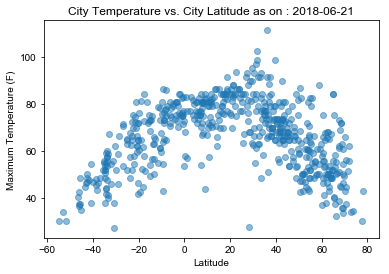

In [10]:
Date = datetime.date.today()

plt.scatter(sample_cities["Lat"],sample_cities["Max Temp"], alpha = 0.5)

plt.title(f"City Temperature vs. City Latitude as on : {Date}")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")

# Setting theme using Seaborne library function
sns.set_style("whitegrid")
plt.savefig("Temperature.png")
plt.show()

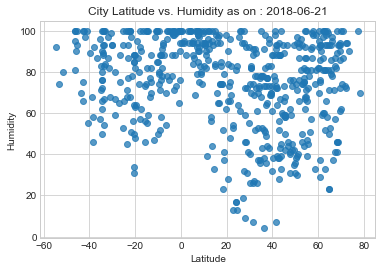

In [11]:
plt.scatter(sample_cities["Lat"],sample_cities["Humidity"], alpha = 0.75)

plt.title(f"City Latitude vs. Humidity as on : {Date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
# Setting theme using Seaborne library function
sns.set_style("whitegrid")
plt.savefig("Humidity.png")
plt.show()

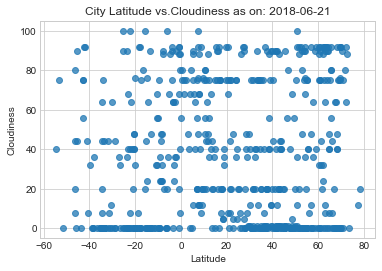

In [12]:
plt.scatter(sample_cities["Lat"],sample_cities["Cloudiness"], alpha = 0.75)

plt.title(f"City Latitude vs.Cloudiness as on: {Date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
# Setting theme using Seaborne library function
sns.set_style("whitegrid")
plt.savefig("Cloudiness.png")
plt.show()

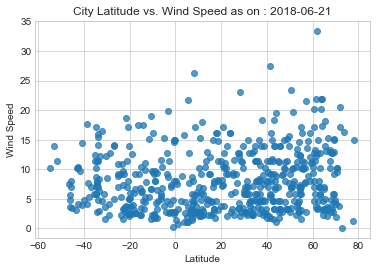

In [13]:
plt.scatter(sample_cities["Lat"],sample_cities["Wind Speed"], alpha= 0.75)
plt.title(f"City Latitude vs. Wind Speed as on : {Date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
# Setting theme using Seaborne library function
sns.set_style("whitegrid")
plt.savefig("Wind Speed.png")
plt.show()

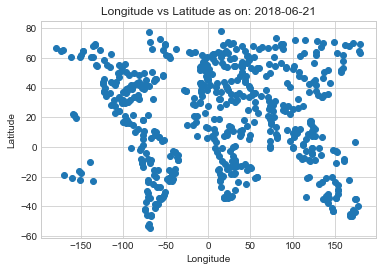

In [14]:
plt.scatter(sample_cities["Long"],sample_cities["Lat"])
plt.title(f"Longitude vs Latitude as on: {Date}")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
# Setting theme using Seaborne library function
sns.set_style("whitegrid")
plt.savefig("Latitude_longitude.png")
plt.show()

In [15]:
# save the output file path
# https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.to_csv.html
sample_cities.to_csv('Weather_Output.csv')